# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [22]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [24]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [25]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html,'html.parser')

In [26]:
# Extract all rows of data
all_rows = []
for x in soup.find_all(class_='data-row'):
    row = [cell.text.strip() for cell in x.find_all('td')]
    all_rows.append(row)
print(all_rows)

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [27]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in soup.find_all('tr',class_='data-row'):
    cells = row.find_all('td')

    row_data = [
        cells[0].text.strip(),  # id
        cells[1].text.strip(),  # terrestrial_date
        cells[2].text.strip(),   # sol
        cells[3].text.strip(),   # ls
        cells[4].text.strip(),   # month
        cells[5].text.strip(),   # min_temp
        cells[6].text.strip()    # pressure
    ]
    print(row_data)
    data.append(row_data)

# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id', 'terrestrial_date','sol', 'ls', 'month', 'min_temp', 'pressure']
mars_df = pd.DataFrame(data,columns=columns)   

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

In [28]:
# Confirm DataFrame was created successfully
print(mars_df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [29]:
# Examine data type of each column
print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [30]:
# Change data types for data analysis
mars_df['id'] = mars_df['id'].astype(object)
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)


In [31]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [32]:
# 1. How many months are there on Mars?
def mars_months(mars_df):
    return mars_df['month'].nunique()

months_on_mars = mars_months(mars_df)
months_on_mars

12

In [33]:
# 2. How many sols (Martian days) worth of data are there?
def sols(mars_df):
    return mars_df['sol'].nunique()

martian_days = sols(mars_df)
martian_days

1867

In [34]:
# 3. What is the average minimum temperature by month?
def coldest_and_warmest_months(mars_df):
    avg_min_temp =mars_df.groupby('month')['min_temp'].mean()
    return avg_min_temp

avg_min_temp = coldest_and_warmest_months(mars_df)
avg_min_temp


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

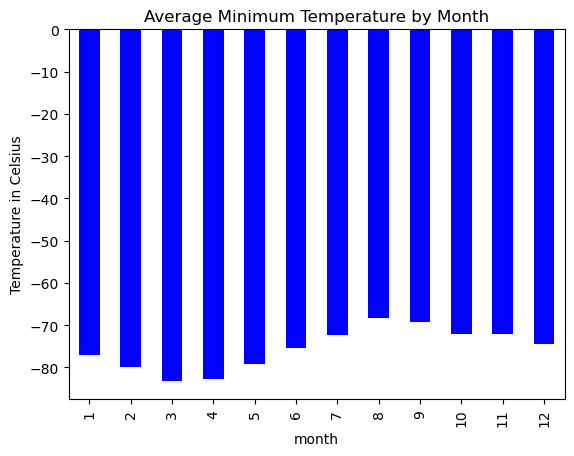

In [35]:
# Plot the average minimum temperature by month
avg_min_temp.plot(kind='bar', color='b')
plt.title("Average Minimum Temperature by Month")
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")
plt.show()


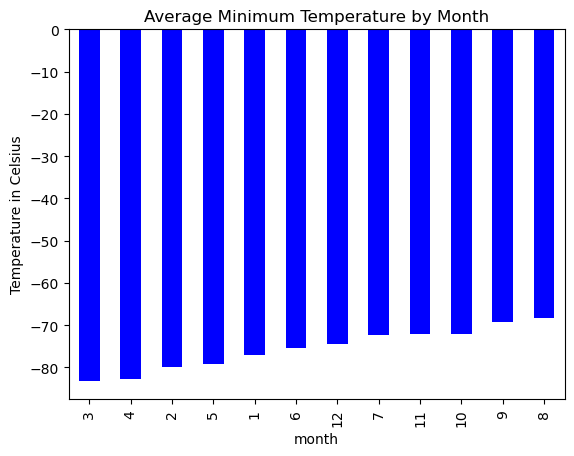

In [36]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_min_temp = avg_min_temp.sort_values()
coldest_month = sorted_avg_min_temp.min()
hottest_month = sorted_avg_min_temp.max()

sorted_avg_min_temp.plot(kind='bar', color='b')
plt.title("Average Minimum Temperature by Month")
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")
plt.show()

In [37]:
# 4. What is the average pressure by month?
def avg_pressure(mars_df):
    avg_pressure =mars_df.groupby('month')['pressure'].mean()
    return avg_pressure

avg_pressure = avg_pressure(mars_df)
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

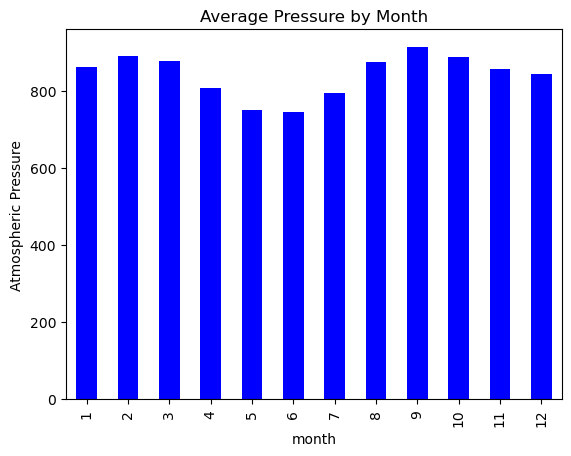

In [38]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar', color='b')
plt.title("Average Pressure by Month")
plt.xlabel("month")
plt.ylabel("Atmospheric Pressure")
plt.show()


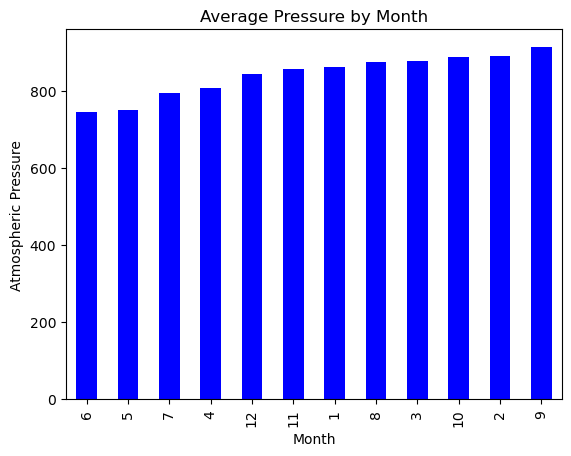

In [39]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure = avg_pressure.sort_values()

lowest_month = sorted_avg_pressure.min()  
highest_month = sorted_avg_pressure.max()  

sorted_avg_pressure.plot(kind='bar', color='b')
plt.title("Average Pressure by Month")
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")
plt.show()

There are approximately 687 Earth days in a Martian year.


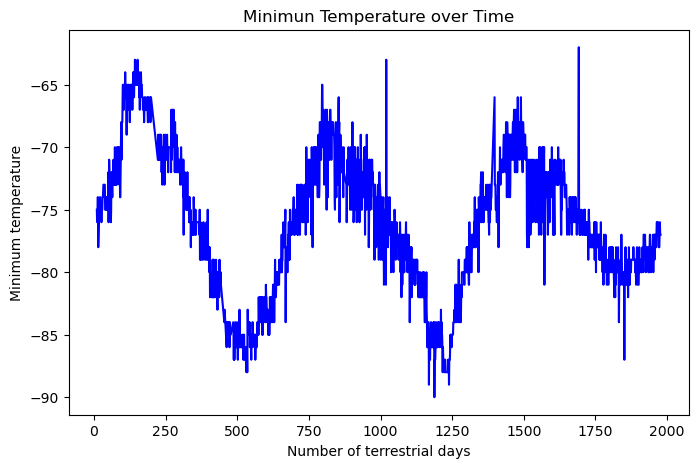

In [40]:
# 5. How many terrestrial (Earth) days are there in a Martian year? 
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_year_days = 687
print(f"There are approximately {mars_year_days} Earth days in a Martian year.")

def terrestrial_days_in_martian_year(mars_df):
    plt.figure(figsize=(8,5))
    plt.plot(mars_df['sol'],mars_df['min_temp'],color='b')
    plt.title("Minimun Temperature over Time")
    plt.xlabel("Number of terrestrial days")
    plt.ylabel("Minimum temperature")
    plt.show()

terrestrial_days_in_martian_year(mars_df)

#### Minimum Temperature

YOUR ANALYSIS HERE:
Coldest and Warmest Months:The coldest minimum temperature occurs in March, indicating that this month experiences the harshest conditions.The warmest minimum temperature is recorded in August, suggesting this month has relatively milder conditions compared to other months.

Temperature Range:The minimum temperature ranges from -82°C to -68°C. This significant range highlights the extreme cold experienced on Mars, with temperatures consistently far below zero.

Comparison to Earth:The analysis indicates that Martian temperatures are drastically lower than those on Earth. For comparison, most terrestrial life thrives in environments with temperatures typically above freezing (0°C). The temperatures on Mars fall well below this threshold, underscoring the planet's inhospitable conditions for most forms of life as we know them.

Implications for Life and Exploration:The extreme cold on Mars presents substantial challenges for potential human habitation and exploration. Technologies for heating, insulation, and life support will be critical for future missions.


#### Atmospheric Pressure

YOUR ANALYSIS HERE:
Average Pressure Range:The average atmospheric pressure on Mars varies between 745 Pa and 913 Pa. This range indicates that the pressures on Mars are relatively low compared to Earth, where average sea-level pressure is about 101,325 Pa (101.3 kPa).The observed pressures suggest that Mars has an atmosphere that is significantly thinner than Earth's, contributing to its inhospitable conditions for life as we know it.

Lowest and Highest Pressure Months:The lowest atmospheric pressure is recorded in June, indicating that this month experiences the least dense atmosphere.The highest atmospheric pressure occurs in September, suggesting that factors such as seasonal changes may influence pressure dynamics on Mars.

#### Year Length

YOUR ANALYSIS HERE:

Pattern Recognition:The graph depicting the relationship between minimum temperature and terrestrial days indicates a clear seasonal pattern. The data shows that the minimum temperatures drop during certain months, likely correlating with the colder seasons on Mars. The peaks and troughs in the temperature graph represent the changing climate conditions throughout the year.

Length of the Martian Year:The analysis reveals that the pattern of minimum temperatures spans approximately 600 days, with fluctuations suggesting seasonal changes. While this is close to the known length of a Martian year (approximately 687 Earth days).

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [41]:
# Write the data to a CSV
mars_df.to_csv('mars_data.csv',index=False)

In [42]:
browser.quit()